In [ ]:
    """ this notebook generates a plot for a sample of carbopol
        in propylenglycol with a concentration of 2wt.% and at 20°C
    
    """

In [1]:
import sqlite3
from plot_function import *
import pandas as pd

In [2]:
connection = sqlite3.connect('sample_database.db')
con = connection.cursor()

In [3]:
fcs = pd.read_sql("SELECT * from flow_curves", con=connection)
flow_curve = fcs[(fcs.sample_ID == 20210716006) & (fcs.temperature == 20)]
flow_curve

,sample_ID,temperature,shear_stress,viscosity,shear_rate,time
227,20210716006,20,331.0,3.31,100.0,2.00
228,20210716006,20,283.0,3.75,75.4,4.18
229,20210716006,20,242.0,4.26,56.9,6.57
230,20210716006,20,208.0,4.85,42.9,9.17
231,20210716006,20,180.0,5.55,32.4,12.00
...,...,...,...,...,...,...
292,20210716006,20,154.0,5.84,26.4,47.10
293,20210716006,20,136.0,6.57,20.7,51.40
294,20210716006,20,120.0,7.40,16.2,56.00
295,20210716006,20,106.0,8.33,12.7,60.70


In [4]:
tcfit = pd.read_sql("SELECT * from tc_fit_results WHERE sample_ID = 20210716006 AND temperature = 20", con=connection)
tcfit

,sample_ID,temperature,yield_stress_TC,err_yield_stress_TC,caract_shear_rate,err_caract_shear_rate,viscinf,err_viscinf,crit_strain_TC,err_crit_strain_TC
0,20210716006,20,8.972668,0.054836,0.11122,0.002398,0.431936,0.018327,0.005354,0.000375


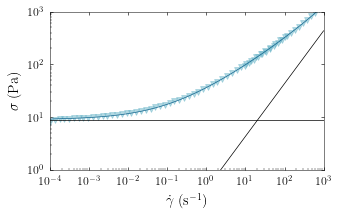

In [5]:
fig, ax, _, _ = create_plot()
x = np.logspace(-4, 3, 40)
"""
Get tc fit variables 
"""
ys = float(tcfit.yield_stress_TC)
gc= float(tcfit.caract_shear_rate)
vinf = float(tcfit.viscinf)
"""
Do the plot
"""
c = '#65b2c6'
# plot the data
ax.loglog(flow_curve.shear_rate, flow_curve.shear_stress, c=c, mfc=c, marker='v', alpha=0.5, ms=6)
# plot the fit 
ax.loglog(x,  ys + ys * (x/gc)**0.5 + vinf * x, ls='-', c='#11648e' , marker='')
ax.axhline(ys, ls='-', c='k', marker='')
ax.loglog(x, vinf * x, c='k', ls='-', marker='')
ax.set(xlabel='$\dot{\gamma}~(\mathrm{s}^{-1})$', 
       ylabel='$\sigma~\mathrm{(Pa)}$', 
       ylim=(1,1000) 
      )
fig.savefig('one_pretty_flow_curve.svg', bbox_inches='tight')